# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.set_option('display.max_colwidth', None)



## 3.4 Functions<a id='3.4_Load_The_Data'></a>

In [2]:
#return the first 5 and last 5 rows of this dataframe
def p(df_):
    if df_.shape[0] > 6:
        print(df_.shape)
        return pd.concat([df_.head(), df_.tail()])
    else:
        return df_

def rcp(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'processed_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'processed_data', file_), parse_dates=pd_)
    
def rcr(file_, pd_=None):
    if pd_ == None:
        return pd.read_csv(os.path.join('..', 'raw_data', file_))
    else:
        return pd.read_csv(os.path.join('..', 'raw_data', file_), parse_dates=pd_)
    
#sort dataframe by column
def s(df_, column_):
    return df_.sort_values(column_)

#reset index and sort dataframe by column
def sr(df_, column_, ascending_=True):
    df_ = df_.sort_values(column_, ascending=ascending_)
    return df_.reset_index(drop=True)

#print length of list
def pl(list_):
    print(len(list_))
    return list_

#print length of list
def pdc(dict_):
    print(len(dict_))
    return dict_

## 3.4 Load Data<a id='3.4_Load_The_Data'></a>

In [3]:
df_adult = rcr('adult.csv')
p(df_adult)

(48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [4]:
pd.options.display.max_info_columns = 999
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df_age_count = df_adult.value_counts('age').reset_index().rename(columns={0:'count'})
p(df_age_count)

(74, 2)


,age,count
0,36,1348
1,35,1337
2,33,1335
3,23,1329
4,31,1325
69,88,6
70,85,5
71,87,3
72,89,2
73,86,1


<AxesSubplot:xlabel='age', ylabel='count'>

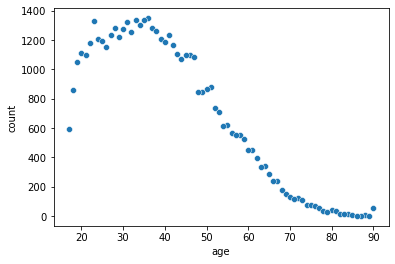

In [6]:
sns.scatterplot(x='age', y='count', data=df_age_count)

<font color='blue'> the most popular age to be working is from approximately 19 to 47 years old inclusive. </font>

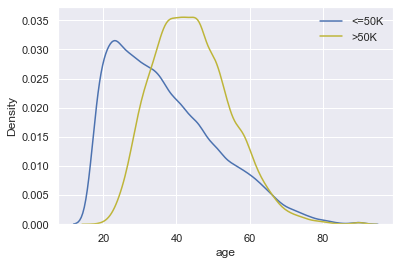

In [7]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['age'], shade=False, color="b", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['age'], shade=False, color="#BEB539", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> Kernel density estimate plots for individuals by age with <=50K in annual income (in blue) and >50K in annual income (in dark yellow) shows the >50K in annual income group has a high count around age 40 relative to other ages. </font>

([<matplotlib.axis.XTick at 0x7f9b004572b0>,
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25'),
  Text(9, 0, '26'),
  Text(10, 0, '27')])

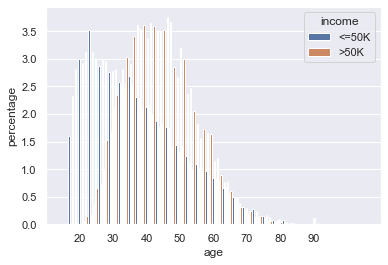

In [8]:
age_counts = (df_adult.groupby(['income'])['age']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('age'))
p = sns.barplot(x="age", y="percentage", hue="income", data=age_counts)
plt.xticks([-7, 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],)

<AxesSubplot:xlabel='age', ylabel='Count'>

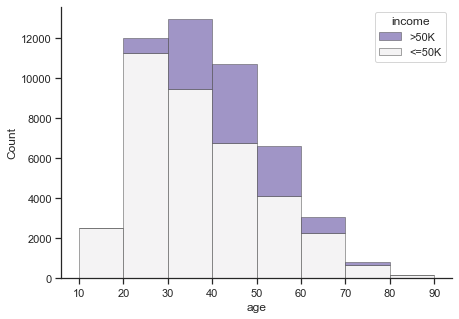

In [9]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=df_adult,
    x="age", hue="income",
    hue_order=['>50K','<=50K'], #https://seaborn.pydata.org/generated/seaborn.histplot.html
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]
)

In [10]:
df_adult.age.max()

90

In [11]:
df_adult.age.min()

17

In [12]:
round((df_adult.age.max() - df_adult.age.min()) / 10)

7

In [13]:
bins = [17, 20, 30, 40, 50, 60, 70, 80, 90]
df_adult['age_bins'] = pd.cut(df_adult['age'], 
                              bins=bins, 
                              labels=['17-20', '21-30', '31-40',
                                      '41-50', '51-60', '61-70',
                                      '71-80', '81-90'])
df_adult.head(11)

#https://stackoverflow.com/questions/45273731/binning-a-column-with-python-pandas

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,age_bins
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,21-30
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,31-40
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,21-30
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,41-50
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,17-20
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,31-40
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,21-30
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K,61-70
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K,21-30
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K,51-60


In [14]:
df_adult_age_bins_income = df_adult.groupby('age_bins')['income'].value_counts().unstack().reset_index()
df_adult_age_bins_income

income,age_bins,<=50K,>50K
0,17-20,3024,4
1,21-30,11181,989
2,31-40,9230,3608
3,41-50,6438,3965
4,51-60,3932,2270
5,61-70,2038,700
6,71-80,594,126
7,81-90,123,25


In [15]:
df_adult_age_bins_income.loc[:, '>_<=_50K_ratio'] = df_adult_age_bins_income.loc[:, '>50K'] / df_adult_age_bins_income.loc[:, '<=50K']
df_adult_age_bins_income

income,age_bins,<=50K,>50K,>_<=_50K_ratio
0,17-20,3024,4,0.001323
1,21-30,11181,989,0.088454
2,31-40,9230,3608,0.390899
3,41-50,6438,3965,0.615874
4,51-60,3932,2270,0.577314
5,61-70,2038,700,0.343474
6,71-80,594,126,0.212121
7,81-90,123,25,0.203252


In [16]:
df_adult_age_bins_income

income,age_bins,<=50K,>50K,>_<=_50K_ratio
0,17-20,3024,4,0.001323
1,21-30,11181,989,0.088454
2,31-40,9230,3608,0.390899
3,41-50,6438,3965,0.615874
4,51-60,3932,2270,0.577314
5,61-70,2038,700,0.343474
6,71-80,594,126,0.212121
7,81-90,123,25,0.203252


Text(0, 0.5, '>50K to <=50K Ratio')

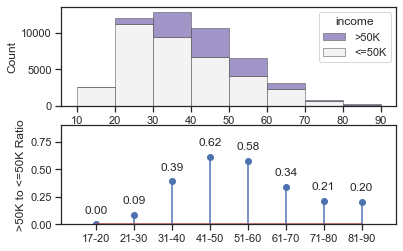

In [17]:
df_adult


# call regplot on each axes
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.histplot(
    data=df_adult,
    x="age", hue="income",
    hue_order=['>50K','<=50K'], #https://seaborn.pydata.org/generated/seaborn.histplot.html
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    bins=[10, 20, 30, 40, 50, 60, 70, 80, 90],
    ax=ax1)

plt.margins(x=.13)


plt.stem(df_adult_age_bins_income.age_bins, df_adult_age_bins_income.loc[:, '>_<=_50K_ratio'])

for i, v in enumerate(df_adult_age_bins_income.loc[:, '>_<=_50K_ratio']):
    ax2.text(i, v+.1, "%.2f" %v, ha="center")

ax2.set_ylim(0,.9)
ax2.set_ylabel('>50K to <=50K Ratio')


<font color='blue'>
The age group of 31-40 has the most number of individuals with an income. However, it is the age group of 41-50 that has the highest ratio of individuals with >50K to <=50K in annual income. This also means the 41-50 age group has the largest percentage with an annual income >50K.</font>

In [18]:
#percentage >50K rate and >50K to <=50K ratio 
#x / (x+y) * f(x,y) = x / y 

#f(x,y) = x/y + 1



In [19]:
df_age_education_income = df_adult.groupby(['age_bins', 'education'])['income']\
                                                .value_counts()\
                                                .unstack()\
                                                .reset_index()
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K
0,17-20,10th,96.0,NaN
1,17-20,11th,363.0,NaN
2,17-20,12th,148.0,2.0
3,17-20,1st-4th,4.0,NaN
4,17-20,5th-6th,16.0,NaN
5,17-20,7th-8th,24.0,1.0
6,17-20,9th,42.0,NaN
7,17-20,Assoc-acdm,19.0,NaN
8,17-20,Assoc-voc,18.0,NaN
9,17-20,Bachelors,3.0,NaN


In [20]:
df_age_education_income.loc[:, '>50K'] = df_age_education_income.loc[:, '>50K'].fillna(0)
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K
0,17-20,10th,96.0,0.0
1,17-20,11th,363.0,0.0
2,17-20,12th,148.0,2.0
3,17-20,1st-4th,4.0,0.0
4,17-20,5th-6th,16.0,0.0
5,17-20,7th-8th,24.0,1.0
6,17-20,9th,42.0,0.0
7,17-20,Assoc-acdm,19.0,0.0
8,17-20,Assoc-voc,18.0,0.0
9,17-20,Bachelors,3.0,0.0


In [21]:
df_age_education_income.loc[:, 'total'] = df_age_education_income.loc[:, '<=50K'] + \
                                          df_age_education_income.loc[:, '>50K']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total
0,17-20,10th,96.0,0.0,96.0
1,17-20,11th,363.0,0.0,363.0
2,17-20,12th,148.0,2.0,150.0
3,17-20,1st-4th,4.0,0.0,4.0
4,17-20,5th-6th,16.0,0.0,16.0
5,17-20,7th-8th,24.0,1.0,25.0
6,17-20,9th,42.0,0.0,42.0
7,17-20,Assoc-acdm,19.0,0.0,19.0
8,17-20,Assoc-voc,18.0,0.0,18.0
9,17-20,Bachelors,3.0,0.0,3.0


In [22]:
df_age_education_income.loc[:, '>50K_rate'] = df_age_education_income.loc[:, '>50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total,>50K_rate
0,17-20,10th,96.0,0.0,96.0,0.000000
1,17-20,11th,363.0,0.0,363.0,0.000000
2,17-20,12th,148.0,2.0,150.0,0.013333
3,17-20,1st-4th,4.0,0.0,4.0,0.000000
4,17-20,5th-6th,16.0,0.0,16.0,0.000000
5,17-20,7th-8th,24.0,1.0,25.0,0.040000
6,17-20,9th,42.0,0.0,42.0,0.000000
7,17-20,Assoc-acdm,19.0,0.0,19.0,0.000000
8,17-20,Assoc-voc,18.0,0.0,18.0,0.000000
9,17-20,Bachelors,3.0,0.0,3.0,0.000000


In [23]:
df_age_education_income.loc[:, '<=50K_rate'] =  df_age_education_income.loc[:, '<=50K'] \
                                              / df_age_education_income.loc[:, 'total']
df_age_education_income.head(11)

income,age_bins,education,<=50K,>50K,total,>50K_rate,<=50K_rate
0,17-20,10th,96.0,0.0,96.0,0.000000,1.000000
1,17-20,11th,363.0,0.0,363.0,0.000000,1.000000
2,17-20,12th,148.0,2.0,150.0,0.013333,0.986667
3,17-20,1st-4th,4.0,0.0,4.0,0.000000,1.000000
4,17-20,5th-6th,16.0,0.0,16.0,0.000000,1.000000
5,17-20,7th-8th,24.0,1.0,25.0,0.040000,0.960000
6,17-20,9th,42.0,0.0,42.0,0.000000,1.000000
7,17-20,Assoc-acdm,19.0,0.0,19.0,0.000000,1.000000
8,17-20,Assoc-voc,18.0,0.0,18.0,0.000000,1.000000
9,17-20,Bachelors,3.0,0.0,3.0,0.000000,1.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


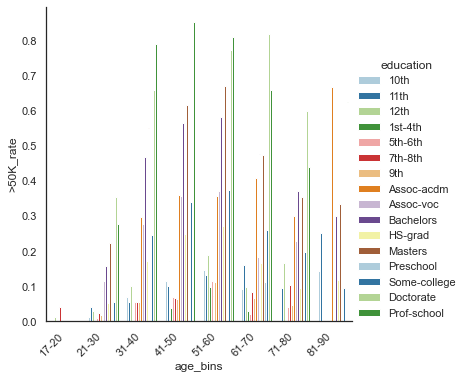

In [24]:
#sns.color_palette("rocket_r", as_cmap=True)
#Paired

sns.factorplot(x='age_bins',
               y='>50K_rate',
               hue='education',
               data=df_age_education_income,
               kind='bar',
               palette="Paired")

plt.tick_params(axis='x', rotation=45)

plt.xticks(ha="right")

plt.tick_params(bottom=False)

plt.tick_params(left=False)


#https://stackoverflow.com/questions/38807895/seaborn-multiple-barplots

In [37]:
import matplotlib.patches as mpatches

df_education_income = df_adult.groupby(['education'])['income'].value_counts().unstack().reset_index()

df_education_income.loc[:, 'total'] = \
df_education_income.loc[:, '<=50K'].values + df_education_income.loc[:, '>50K']

df_education_income.loc[:, '>50K_rate'] = \
df_education_income.loc[:, '>50K'].values / df_education_income.loc[:, 'total']

df_education_income_total = df_education_income

df_education_income_total.sort_values(['>50K_rate', 'total'], inplace=True, ascending=False)

sns.set(style="darkgrid")

plt.figure(figsize=(7, 7))

bar1 = sns.barplot(x="education",  y="total", data=df_education_income_total, color='r')

bar2 = sns.barplot(x="education",
                   y="<=50K",
                   data = df_education_income_total,
                   color='#D9CC7A')

top_bar = mpatches.Patch(color='r', label='>50K')
bottom_bar = mpatches.Patch(color='#D9CC7A', label='<=50K')

for index, value in enumerate(round(df_education_income_total.loc[:,'>50K_rate'], 2)):
    plt.text(index, value, str(value), ha="center")

plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

TypeError: float() argument must be a string or a number, not 'list'

<Figure size 504x504 with 1 Axes>

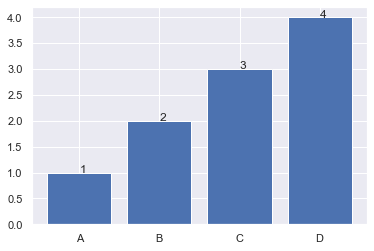

In [26]:
x = ["A", "B", "C", "D"]
y = [1, 2, 3, 4]
plt.bar(x, y)

for index, value in enumerate(y):
    plt.text(index, value, str(value))

#https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python

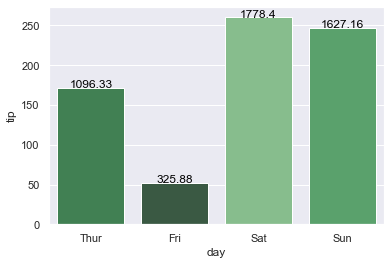

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

pal = sns.color_palette("Greens_d", len(groupedvalues))
rank = groupedvalues["total_bill"].argsort().argsort() 
g=sns.barplot(x='day',y='tip',data=groupedvalues, palette=np.array(pal[::-1])[rank])

for index, row in groupedvalues.iterrows():
    g.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")

plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = sns.load_dataset("tips")
groupedvalues=df.groupby('day').sum().reset_index()

groupedvalues

,day,total_bill,tip,size
0,Thur,1096.33,171.83,152
1,Fri,325.88,51.96,40
2,Sat,1778.40,260.40,219
3,Sun,1627.16,247.39,216


In [29]:
(groupedvalues.shape)

(4, 4)

In [30]:
type(groupedvalues)

pandas.core.frame.DataFrame

0
1
2
3


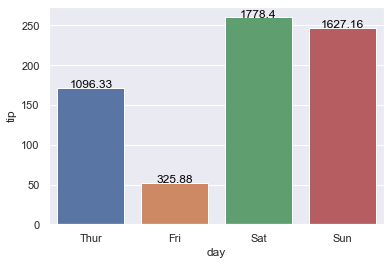

In [31]:

bar3=sns.barplot(x='day',y='tip',data=groupedvalues)

for index, row in groupedvalues.iterrows():
    bar3.text(row.name,row.tip, round(row.total_bill,2), color='black', ha="center")
    print(row.name)

plt.show()

In [32]:
df_education_income_total.head(11)

income,education,<=50K,>50K,total,>50K_rate
14,Prof-school,217,617,834,0.739808
10,Doctorate,163,431,594,0.725589
12,Masters,1198,1459,2657,0.549116
9,Bachelors,4712,3313,8025,0.412835
7,Assoc-acdm,1188,413,1601,0.257964
8,Assoc-voc,1539,522,2061,0.253275
15,Some-college,8815,2063,10878,0.189649
11,HS-grad,13281,2503,15784,0.158578
2,12th,609,48,657,0.073059
5,7th-8th,893,62,955,0.064921


In [33]:
df_education_income_total = df_education_income_total.reset_index(drop=True)
df_education_income_total

income,education,<=50K,>50K,total,>50K_rate
0,Prof-school,217,617,834,0.739808
1,Doctorate,163,431,594,0.725589
2,Masters,1198,1459,2657,0.549116
3,Bachelors,4712,3313,8025,0.412835
4,Assoc-acdm,1188,413,1601,0.257964
5,Assoc-voc,1539,522,2061,0.253275
6,Some-college,8815,2063,10878,0.189649
7,HS-grad,13281,2503,15784,0.158578
8,12th,609,48,657,0.073059
9,7th-8th,893,62,955,0.064921


In [34]:
df_education_income_total.columns.name = None


In [35]:
df_education_income_total

,education,<=50K,>50K,total,>50K_rate
0,Prof-school,217,617,834,0.739808
1,Doctorate,163,431,594,0.725589
2,Masters,1198,1459,2657,0.549116
3,Bachelors,4712,3313,8025,0.412835
4,Assoc-acdm,1188,413,1601,0.257964
5,Assoc-voc,1539,522,2061,0.253275
6,Some-college,8815,2063,10878,0.189649
7,HS-grad,13281,2503,15784,0.158578
8,12th,609,48,657,0.073059
9,7th-8th,893,62,955,0.064921


IndexingError: Too many indexers

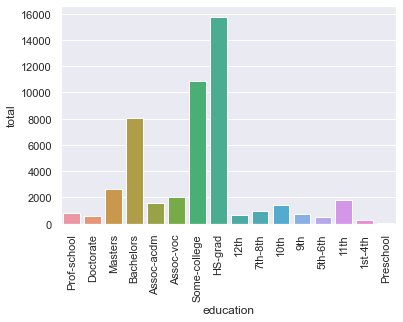

In [36]:

bar3 = sns.barplot(x='education', y='total',data=df_education_income_total)

plt.tick_params(axis='x', rotation=90)

for index, row in df_education_income_total.iterrows():
    bar3.text(row.name, row.total, round(row.loc[:, '>50K_rate'],2), color='black', ha="center")

    
plt.show()

In [ ]:
import matplotlib.patches as mpatches

sns.set(style="darkgrid")

plt.figure(figsize=(14, 14))

bar1 = sns.barplot(x="education",  y="total", data=df_age_education_income, color='#41ab5d')

bar2 = sns.barplot(x="gender",
                   y="<=50K",
                   data = df_age_education_income,
                   color='#8c6bb1')

top_bar = mpatches.Patch(color='#8c6bb1', label='<=50K')
bottom_bar = mpatches.Patch(color='#41ab5d', label='>50K')
plt.legend(handles=[top_bar, bottom_bar], frameon=False)

plt.tick_params(axis='x', rotation=90)

plt.ylabel('count')

plt.show()

#https://www.python-graph-gallery.com/stacked-and-percent-stacked-barplot

In [ ]:
sns.set(style="darkgrid")

fig = sns.histplot(df_adult.loc[df_adult.income == '<=50K', :]['educational-num'],
                   color="b",
                   label='<=50K',
                   kde=True)

fig = sns.histplot(df_adult.loc[df_adult.income == '>50K', :]['educational-num'], 
                   color="r", 
                   label='>50K', 
                   kde=True)

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables



In [ ]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['educational-num'], shade=False, color="b", label='<=50K')
fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['educational-num'], shade=False, color="r", label='>50K')

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


<font color='blue'> The KDE plot of individuals with greater than 50K in annual income and those with not shows there is a higher proportion of the >50K in annual income group with a larger educational-num than the <=50K in annual income group. Also, a higher proportion of the  <=50K in annual income group with lower (i.e. less than 11) educational-num than the >50K in annual income group. </font>

In [ ]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['capital-gain'], shade=False, color="#CBBD35", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-gain'], shade=False, color="#66B4BC", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


In [ ]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['hours-per-week'], shade=False, color="green", label='<=50K')
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['hours-per-week'], shade=False, color="black", label='>50K')

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


In [ ]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df_adult.loc[df_adult.income == '<=50K', :]['capital-loss'], 
                  shade=False, 
                  color="r", 
                  label='<=50K',
                  bw_method=.12)
#https://htmlcolorcodes.com/color-picker/

fig = sns.kdeplot(df_adult.loc[df_adult.income == '>50K', :]['capital-loss'], 
                  shade=False, 
                  color="#66B4BC", 
                  label='>50K',
                  bw_method=.12)

#https://stackoverflow.com/questions/68096271/how-to-color-different-seaborn-kdeplots-in-one-figure

plt.legend(frameon=False)

#https://stackoverflow.com/questions/44968012/unable-to-show-legend-in-seaborn-distplot


plt.show()

#https://www.python-graph-gallery.com/74-density-plot-of-several-variables


In [ ]:
# Plot colored by continent for years 2000-2007
sns.pairplot(df_adult, 
             vars = ['age', 'educational-num'], 
             hue = 'income', diag_kind = 'kde', 
             plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'k'},
             size = 4);
# Title 
plt.suptitle('Pair Plot', 
             size = 28);


#https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

In [ ]:
sns.displot(df_adult, x="educational-num", hue='income', kind="kde", bw_adjust=1.7)

#https://seaborn.pydata.org/tutorial/distributions.html

## 3.6 Summary<a id='3.6_Summary'></a>